# Path plots

In [1]:
import pandas as pd
import numpy as np

from plotnine import (
    ggplot,
    aes,
    geom_path,
    geom_line,
    labs,
    scale_color_continuous,
    element_text,
    theme
)
from plotnine.data import economics

### Path plots

`geom_path()` connects the observations in the order in which they
appear in the data, this is different from `geom_line()` which connects
observations in order of the variable on the x axis.

In [2]:
economics.head(10) # notice the rows are ordered by date

Because the data is in date order `geom_path()` (in pint) produces the
same result as `geom_line()` (in black):

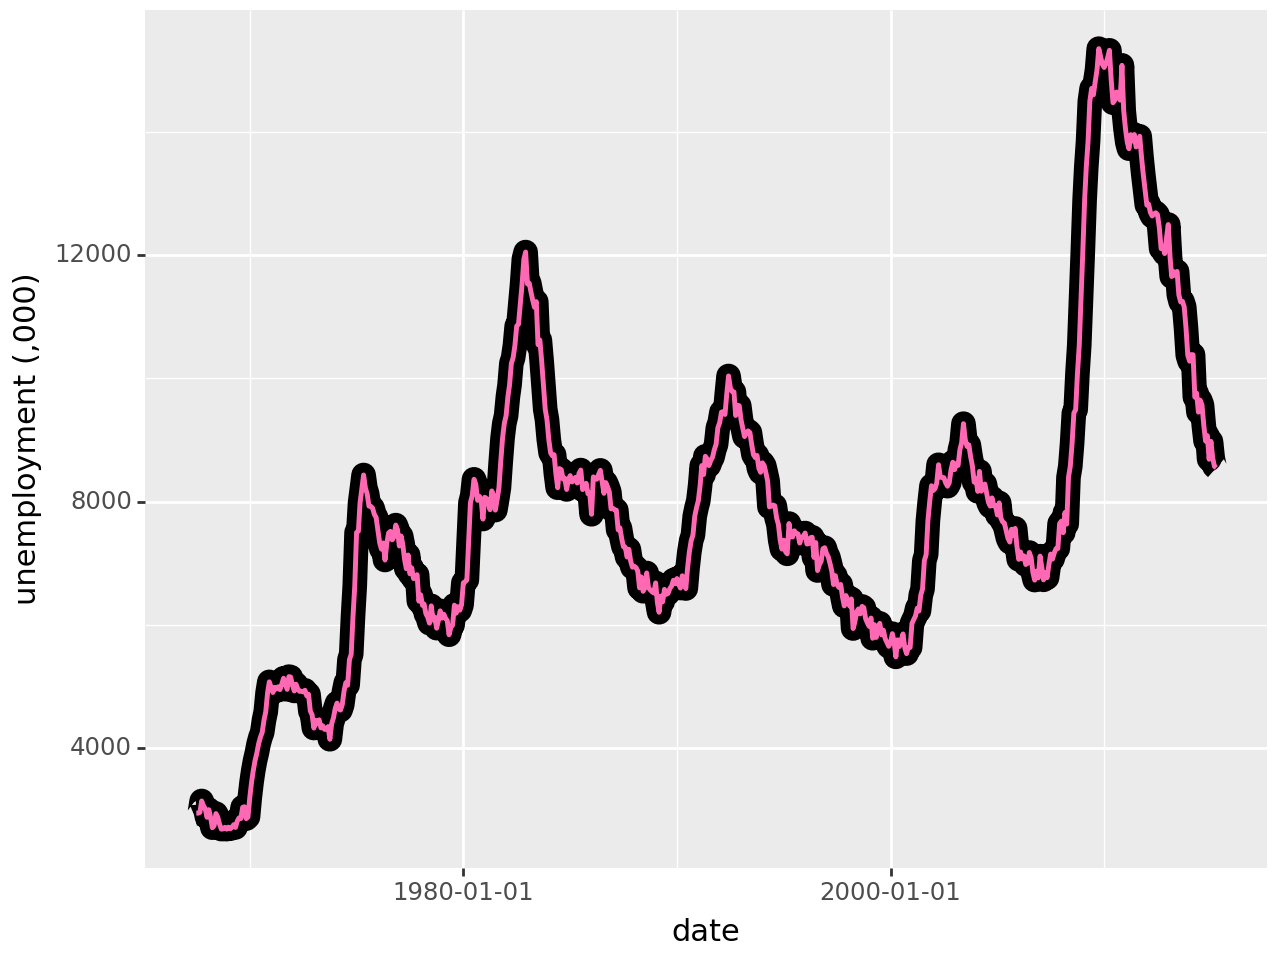

In [3]:
(
    ggplot(economics, aes(x='date', y='unemploy')) 
    + geom_line(size=5)             # plot geom_line as the first layer                   
    + geom_path(colour='#ff69b4',   # plot a path - colour pink 
               size=1)   
    + labs(x='date', y='unemployment (,000)') # label x & y-axis
)

Plotting unemployment (scaled by population) versus savings rate shows
how `geom_path()` differs from `geom_line()`. Because `geom_path()`
connects the observations in the order in which they appear in the data,
this line is like a “journey through time”:

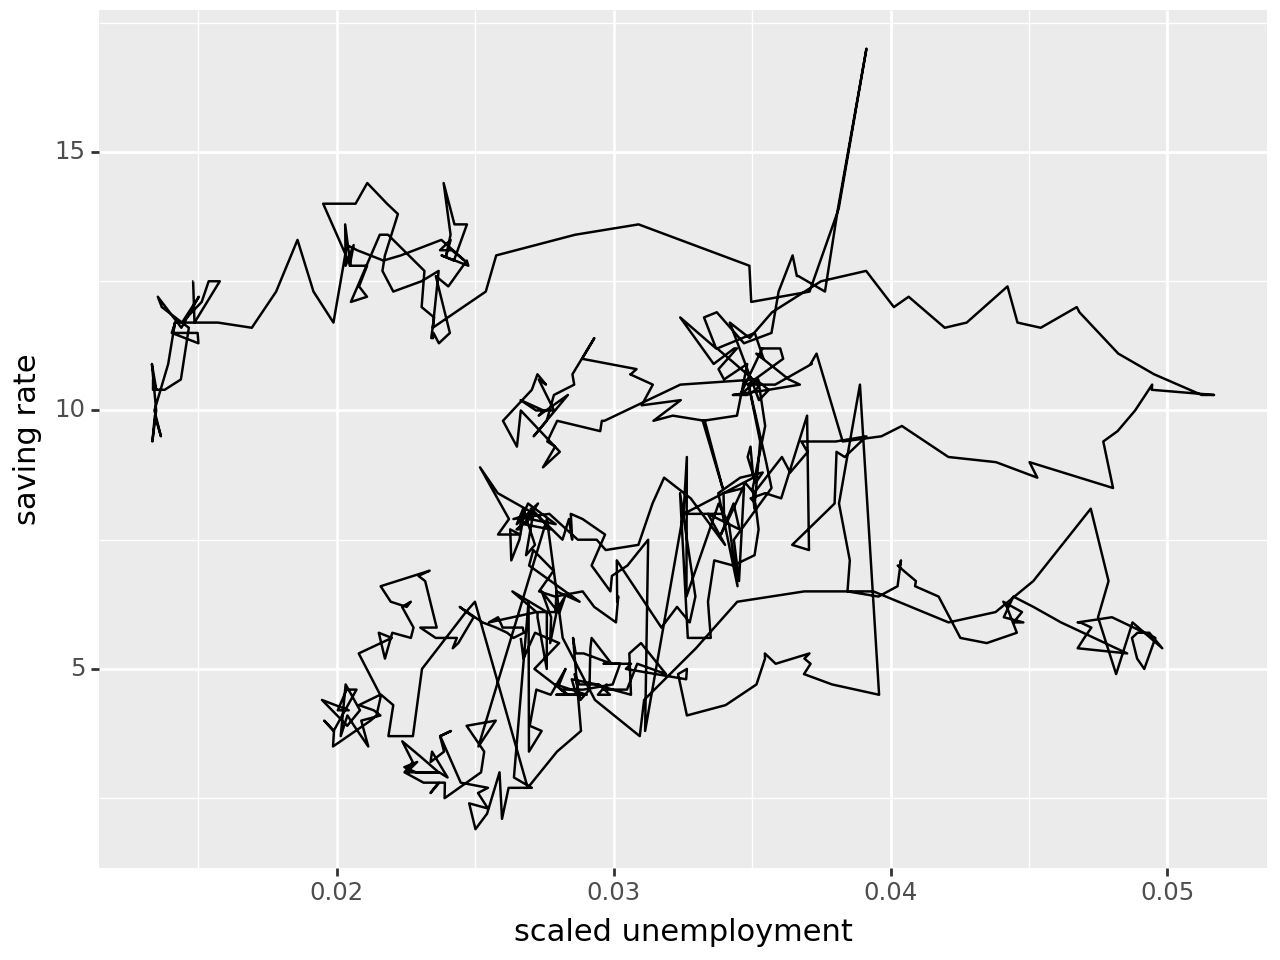

In [4]:
(
    ggplot(economics, aes(x='unemploy/pop', y='psavert')) 
    + geom_path()                                    # plot geom path
    + labs(x='scaled unemployment', y='saving rate') # label x & y-axis
)

Comparing `geom_line()` (black) to `geom_path()` (pink) shows how these
two plots differ in what they can show: `geom_path()` shows the savings
rate has gone down over time, which is not evident with `geom_path()`.

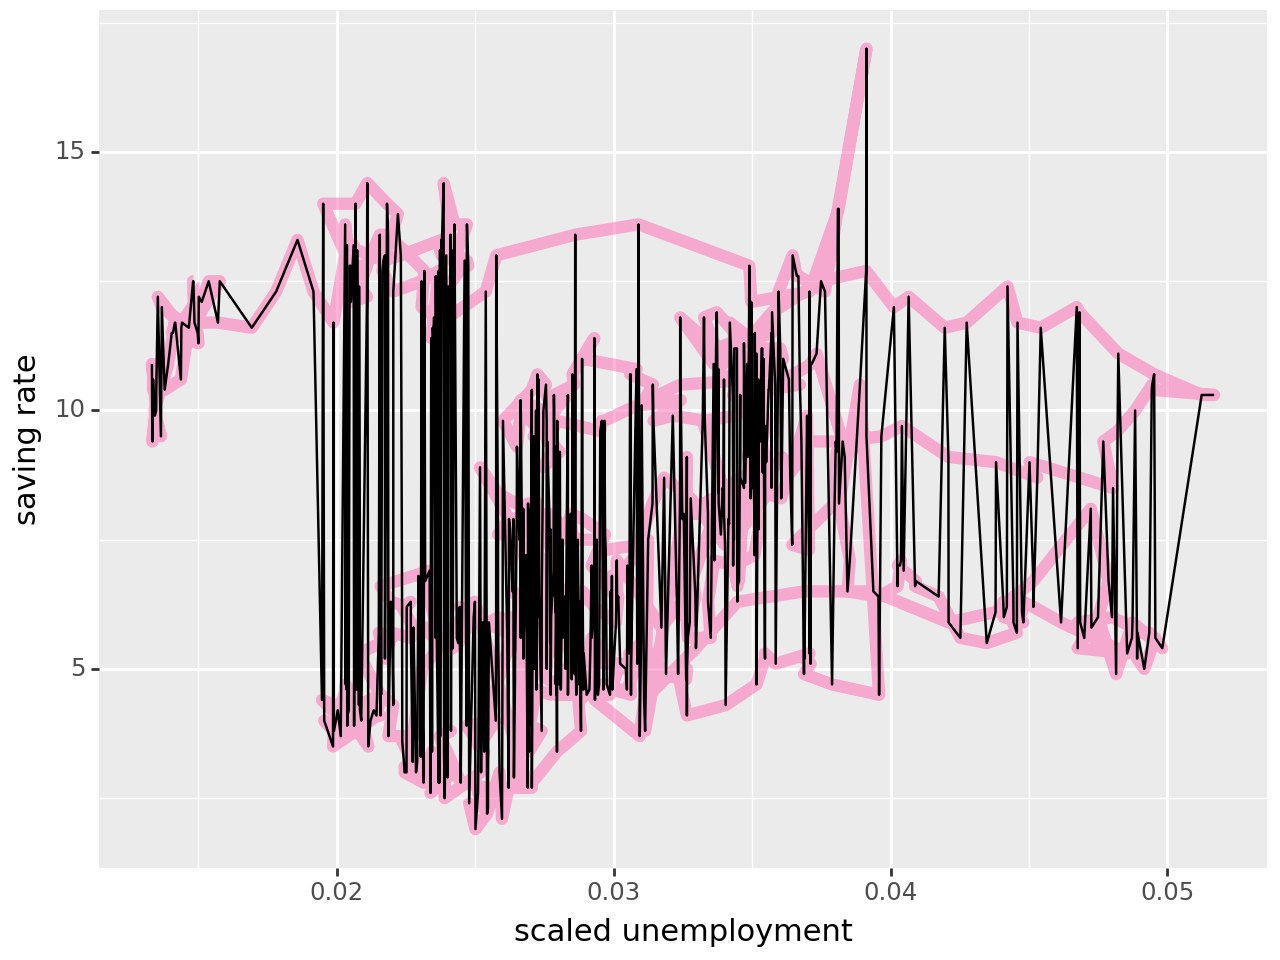

In [5]:
(
    ggplot(economics, aes(x='unemploy/pop', y='psavert')) 
    + geom_path(colour='#ff69b4', # plot geom_path as the first layer - colour pink
                alpha=0.5,        # line transparency
                size=2.5)         # line thickness
    + geom_line()                   # layer geom_line 
    + labs(x='scaled unemployment', y='saving rate') # label x & y-axis
)

The `geom_path` can be easier to interpret if time is coloured in. First
convert time to a number, and use this number to colour the path:

In [6]:
# convert date to a number 
economics['date_as_number']=pd.to_numeric(economics['date'])

In [7]:
# inspect new column
economics.head()

The path is coloured such that it changes with time using the command
`aes(colour='date_as_number')` within `geom_path()`.

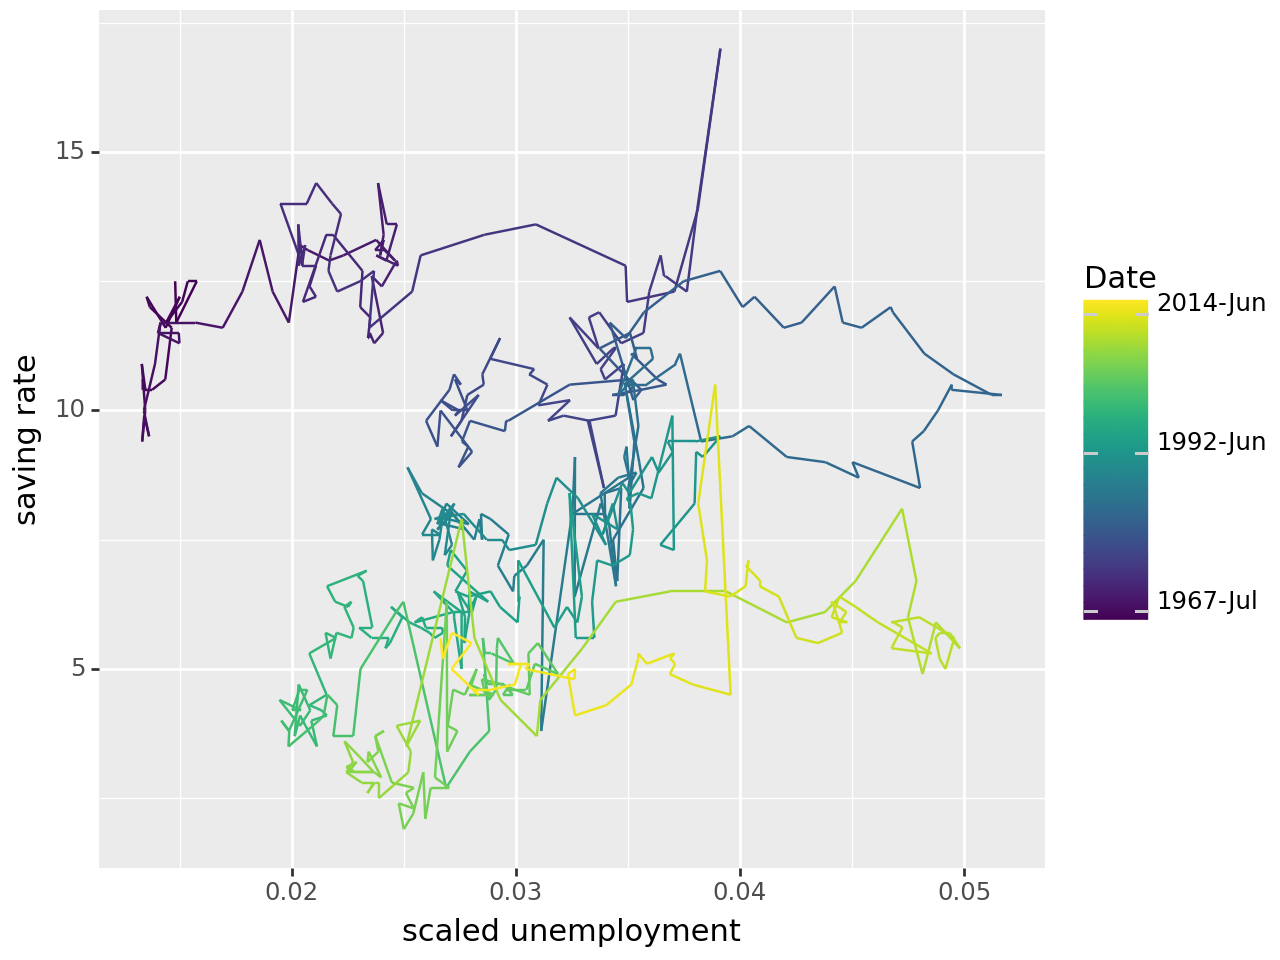

In [8]:
# input
legend_breaks=[-79056000000000000, 709948800000000000, 1401580800000000000] # used to modify colour-graded legend
legend_labels=["1967-Jul", "1992-Jun","2014-Jun"]

# plot
(
    ggplot(economics, aes(x='unemploy/pop', y='psavert')) 
    + geom_path(aes(colour='date_as_number'))       # colour geom_path using time variable "date_as_number"
    + labs(x='scaled unemployment', y='saving rate')
    + scale_color_continuous(breaks=legend_breaks,  # set legend breaks (where labels will appear)
                            labels=legend_labels)   # set labels on legend
    + theme(legend_title=element_text(text='Date')) # set title of legend
)